In [1]:
import pickle
import pandas
import numpy as np

import keras
from keras.preprocessing import image
from keras import applications
from keras.models import Sequential
from keras.applications import vgg16
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Conv2D, Conv3D,Input, ZeroPadding3D, Reshape,LSTM
from keras.layers.convolutional import Convolution2D, Convolution3D, MaxPooling2D, ZeroPadding2D,ZeroPadding3D 
from keras.layers.core import Reshape
import os
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import CSVLogger
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers import Merge 
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras import regularizers
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import mean_squared_error

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X = np.load("train_X_normalized_lstm_delta.pkl.npy")
Y = np.load("train_Y_normalized_lstm_delta.pkl.npy")
X_test = np.load("test_X_normalized_lstm_delta.pkl.npy")
Y_test = np.load("test_Y_normalized_lstm_delta.pkl.npy")
# de_norm_test = np.load("de_norm_lstm_delta_test.pkl.npy")
# unnormalized_Y = np.load("unnormalized_Y_test_v2.pkl.npy")
# Y_reg = np.load("test_Y_normalized_lstm_regression_v2.pkl.npy")
# X = np.load("train_X_normalized_lstm_classification.pkl.npy")
# Y = np.load("train_Y_normalized_lstm_classification.pkl.npy")

In [89]:
print(de_norm_test.shape)
de_norm_test=de_norm_test[:,3]
de_norm_test.reshape(de_norm_test.shape[0], -1)
print(de_norm_test.shape)

(155661, 5)
(155661,)


In [90]:
X = X.reshape(X.shape[0], X.shape[1], -1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

In [91]:
print(unnormalized_Y)

[ 435.51  435.5   435.68 ... 7381.06 7394.99 7398.  ]


In [86]:
def mse_pred(y_true,y_pred, de_norm_test, de_norm_flag):
    se = 0
    categories = np.array([-0.15, -0.075, -0.03,-0.005,0.005,0.03,0.075,0.15])
    if de_norm_flag:
        pred = de_norm_test*(categories[np.argmax(y_pred,axis = 1)]+1)
    else:
        pred = categories[np.argmax(y_pred,axis = 1)]
    mse = mean_squared_error(y_true, pred)
    print("mean squared error equivalent in test set is", mse)
    return mse,pred


In [3]:
def build_model(X):
    model = Sequential()

    model.add(LSTM(512,
        input_shape=(X.shape[1],X.shape[2]),
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        512,
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(3, activation = 'softmax')) ############ change dense layer node number to number of baskets.
    #Adm = keras.optimizers.Adam(lr = 0.001)
    #model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['categorical_accuracy'])
    model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
    # K.tensorflow_backend._get_available_gpus()
    return model


In [4]:
model = build_model(X)
model.summary()
res = model.fit(X, Y,batch_size=512, epochs=8,verbose=1, shuffle=True,validation_split = 0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 512)           1060864   
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 3,161,603
Trainable params: 3,161,603
Non-trainable params: 0
_________________________________________________________________
Train on 700471 samples, validate on 77831 samples
Epoch 1/8
700471/700471 [==============================] - 938s 1ms/step - loss: 

In [92]:
# load previous model
#model = load_model('lstm_delta.h5')
model = load_model('lstm_1_delta.h5')
n = 3 # number of epochs before test

for e in range(1):
    print("Epoch ",e,"to",e+n)
    # train
    #res = model.fit(X, Y,batch_size=512, epochs=n,verbose=1, shuffle=True,validation_split = 0.1)

    # evaluate on test set, print [loss, accuracy]
    #test_result = model.evaluate(X_test, Y_test)
    #print(test_result)
    
    # evaluate on test set again, print equivalent
    #Y_pred = model.predict(X_test)
    mse,pred = mse_pred(unnormalized_Y,Y_pred,de_norm_test,True)
    #mse,pred = mse_pred(Y_reg,Y_pred,de_norm_test,False)
    

Epoch  0 to 3
mean squared error equivalent in test set is 624235.1512619245


In [51]:
model.save("lstm_1_delta.h5")

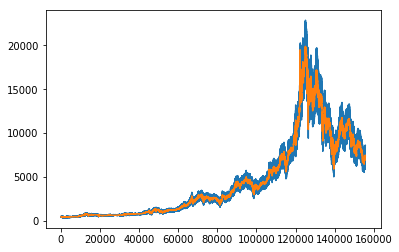

In [93]:
import matplotlib.pyplot as plt
t = np.arange(0,pred.shape[0])
plt.plot(t, pred, unnormalized_Y)
plt.show()